**Nome:** Iran Freitas Ribeiro

**Matrícula:** 2021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from statsmodels.tsa.stattools import ccf
plt.style.use('seaborn')

In [2]:
Z = pd.read_csv("epc9dat.txt", sep=" ", header=None)
Z = Z[[3,6]].rename(columns={3:'y',6:'x'})
Z.head()

,y,x
0,24.615091,344.47342
1,24.615091,344.76187
2,24.615091,344.66571
3,24.602808,344.40930
4,24.602808,344.56952


# Questão 1

## 1.1 

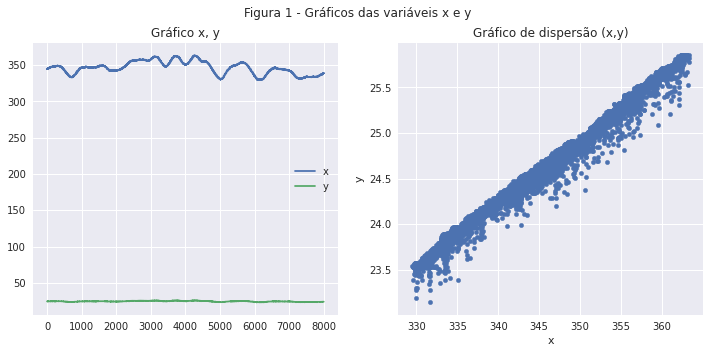

In [23]:
fig, ax = plt.subplots(figsize=(12,5), ncols=2)
Z[['x','y']].plot(ax=ax[0])
Z.plot(kind='scatter',x='x',y='y', ax=ax[1])
ax[0].set_title("Gráfico x, y")
ax[1].set_title("Gráfico de dispersão (x,y)")
plt.suptitle("Figura 1 - Gráficos das variáveis x e y");

A Figura $1$, no gráfico de x,y (à esquerda) mostra que, se analisadas separadamente, as variáveis $x$ e $y$ são muito diferentes: os valores da variável $x$ são muito maiores que os da variável $y$ e, visualmente, $x$ varia mais que $y$ ao longo das amostras.

No gráfico da direita, entretanto, o gráfico da dispersão entre $x$ e $y$ indica que pode haver uma correlação positiva entre as duas variáveis, pois para maiores valores de $x$ temos também maiores valores de $y$.

## 1.2

In [34]:
c1,pvalue = pearsonr(Z['x'],Z['y'])
c1, pvalue

(0.9937339736311894, 0.0)

Usando a totalidade dos dados a correlação entre $x$ e $y$ é $0.993$, um valor muito próximo de $1$, com um $P-$ value $=0.0$ < $0.05$, ou seja, as variáveis possuem uma correlação significativamente diferente de $0$.

In [37]:
Z_500 = Z.sample(500)
c2,pvalue = pearsonr(Z_500['x'],Z_500['y'])
c2, pvalue, c1-c2

(0.9928632057554339, 0.0, 0.0008707678757555737)

Usando $500$ pares $(x,y)$ selecionados aleatoriamente, temos uma correlação de $\approx 0.992$, apenas cerca de $1$ milésimo de diferença entre uma correlação em outra. Além disso, o $P-$ value ainda é $0$, indicando que a correlação entre as duas variáveis ainda é significativamente diferente de $0$

# Questão 2

## 2.1

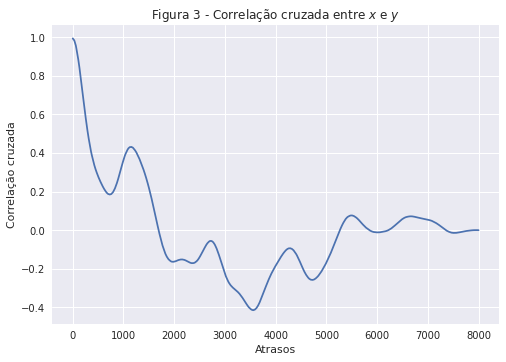

In [5]:
crus_corr = ccf(Z['x'],Z['y'], adjusted=False)
fig, ax = plt.subplots()
ax.plot(crus_corr)
ax.set_ylabel("Correlação cruzada")
ax.set_xlabel("Atrasos")
plt.title("Figura 3 - Correlação cruzada entre $x$ e $y$");

## 2.2

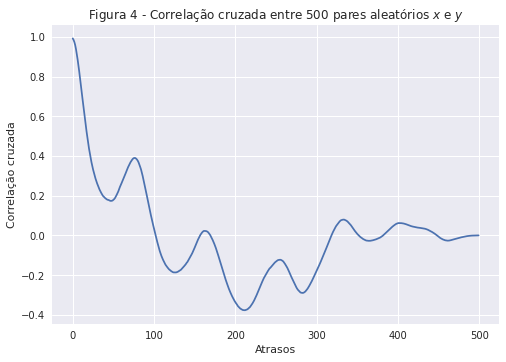

In [10]:
Z_500 = Z.sample(500)
Z_500.sort_index(inplace=True) # ordena
crus_corr = ccf(Z_500['x'],Z_500['y'], adjusted=False)
fig, ax = plt.subplots()
ax.plot(crus_corr)
ax.set_ylabel("Correlação cruzada")
ax.set_xlabel("Atrasos")
plt.title("Figura 4 - Correlação cruzada entre 500 pares aleatórios $x$ e $y$");

# Questão 3

## 3.1

In [18]:
Z_100 = Z.sample(100) # seleciono 100 amostras

In [29]:
betas_0 = []
betas_1 = []
# percorre todos pares
for xi, yi in Z_100.values:    
    x = np.array([xi])
    y = np.array([yi])
    # b0 e b1 podem ser estimados usando a pseudoinversa
    A = np.vstack([x, np.ones(len(x))]).T
    pinv = np.linalg.pinv(A)
    b0, b1 = pinv.dot(y)
    betas_0.append(b0)
    betas_1.append(b1)
    

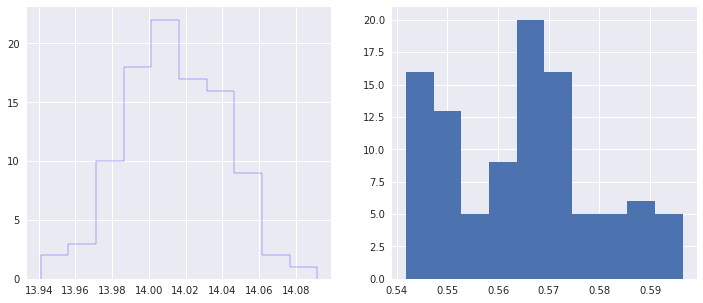

In [35]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
ax[0].hist(betas_0, histtype='step', color='blue')
ax[1].hist(betas_1);

## 3.2

# Questão 5

## 5.1

## 5.2

In [36]:
np.sum([1700, 1726, 1749, 1775, 1801])

8751

In [37]:
np.sum([1700.0, 1725.25, 1750.5, 1775.75, 1801.0])

8752.5